### The goal of this particular project is to check if a business goes bankrupt from different factors like industrial risk, management risk, financial flexibility, credibility, competitiveness and operating risk and prevent bankruptcy.

#### There are 3 categorical value in the  first 6 columns : 0=low risk, 0.5=medium risk, 1=high risk. And the class is either bankruptcy or non-bankruptcy


In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import chi2_contingency

# Import label encoder
from sklearn import preprocessing
  



In [2]:
data = pd.read_excel("bankruptcy-prevention.xlsx",index_col=0)

In [3]:
data.head()

""
industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0.5;1;0;0;0;0.5;bankruptcy
0;1;0;0;0;1;bankruptcy
1;0;0;0;0;1;bankruptcy
0.5;0;0;0.5;0;1;bankruptcy
1;1;0;0;0;1;bankruptcy


In [4]:
data.to_csv('bankruptcy-prevention.csv')

In [5]:
df = pd.read_csv('bankruptcy-prevention.csv', sep = ';')

In [6]:
# remove special character
df.columns = df.columns.str.replace(' ', '')

### Explore the dataset:

In [7]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [8]:
# Display the first 5 rows of the dataset
print(df.head())


   industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk       class  
0              0.0             0.5  bankruptcy  
1              0.0             1.0  bankruptcy  
2              0.0             1.0  bankruptcy  
3              0.0             1.0  bankruptcy  
4              0.0             1.0  bankruptcy  


In [9]:

# Display the last 5 rows of the dataset
print(df.tail())


     industrial_risk  management_risk  financial_flexibility  credibility  \
245              0.0              1.0                    1.0          1.0   
246              1.0              1.0                    0.5          1.0   
247              0.0              1.0                    1.0          0.5   
248              1.0              0.0                    0.5          1.0   
249              1.0              0.0                    0.5          0.5   

     competitiveness  operating_risk           class  
245              1.0             1.0  non-bankruptcy  
246              1.0             0.0  non-bankruptcy  
247              0.5             0.0  non-bankruptcy  
248              0.5             0.0  non-bankruptcy  
249              1.0             1.0  non-bankruptcy  


In [10]:

# Get the number of rows and columns in the dataset
print(df.shape)


(250, 7)


In [11]:

# Get a summary of the dataset
df.describe()


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:

# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None


In [13]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [14]:
df['class'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

### Check for missing values

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


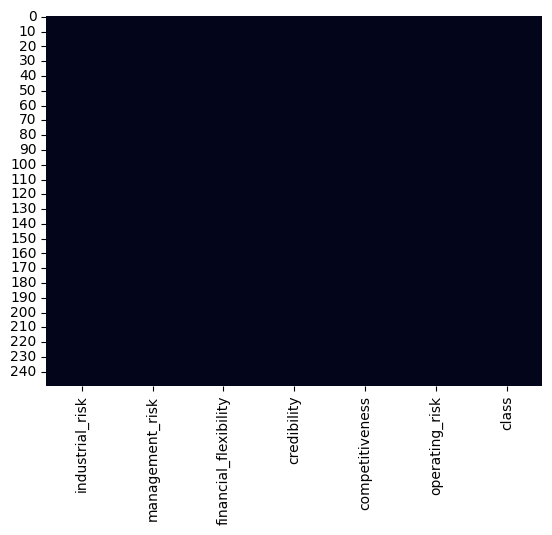

In [15]:
#Check for missing values: Check if there are any missing values in your dataset using the isnull() function.
# Check for missing values
print(df.isnull().sum())

# Visualize the missing values using heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Check for class imbalance:

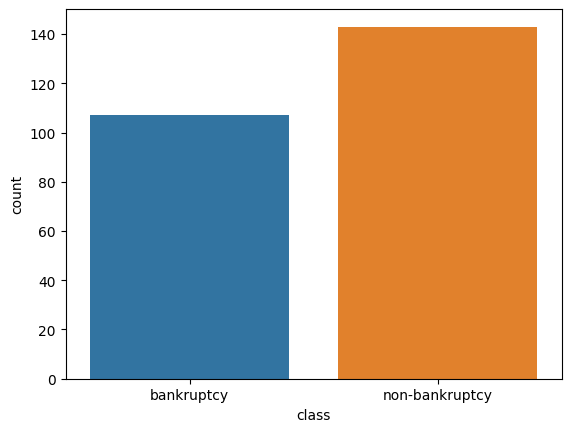

In [19]:
#Check for class imbalance: Check if there is any class imbalance in your dataset. You can plot the class distribution using a bar plot.
sns.countplot(x='class', data=df)
plt.show()

In [20]:
# Group the dataset by the target variable and calculate the statistics
class_stats = df.groupby('class').agg(['count', 'mean', 'std'])

# Print the statistics
class_stats

industrial_risk                     management_risk            \
                         count      mean       std           count      mean   
class                                                                          
bankruptcy                 107  0.626168  0.412616             107  0.789720   
non-bankruptcy             143  0.437063  0.393016             143  0.482517   

                         financial_flexibility                      \
                     std                 count      mean       std   
class                                                                
bankruptcy      0.336725                   107  0.028037  0.134441   
non-bankruptcy  0.412876                   143  0.636364  0.331353   

               credibility                     competitiveness            \
                     count      mean       std           count      mean   
class                                                                      
bankruptcy             107  0.107477  0.238193             107  0.018692   
non-bankruptcy         143  0.741259  0.295823             143  0.818182   

                         operating_risk                      
                     std          count      mean       std  
class                                                        
bankruptcy      0.095296            107  0.710280  0.388741  
non-bankruptcy  0.241368            143  0.465035  0.438669

### Explore individual features:

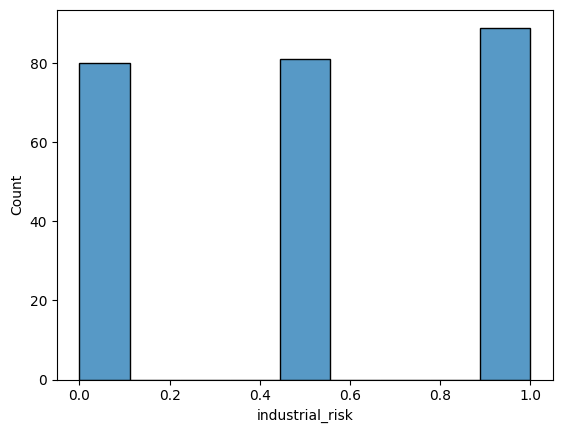

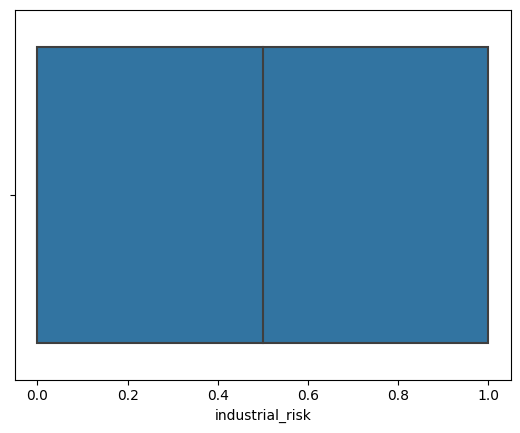

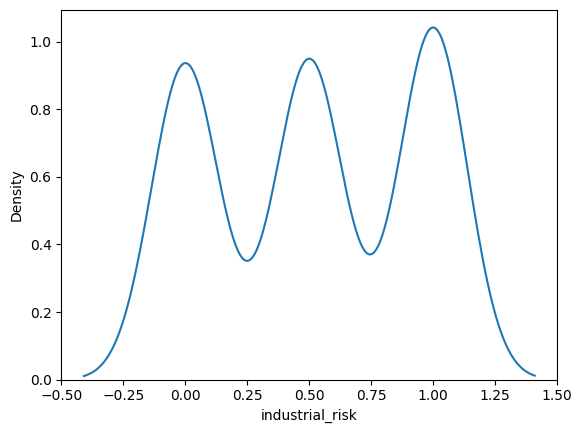

In [21]:
#Explore individual features: Explore each feature in your dataset using histograms, boxplots, or density plots. You can use the following code to plot a histogram of a feature:
# Plot a histogram of a feature
sns.histplot(data=df, x='industrial_risk')
plt.show()

# Plot a boxplot of a feature
sns.boxplot(data=df, x='industrial_risk')
plt.show()

# Plot a density plot of a feature
sns.kdeplot(data=df, x='industrial_risk')
plt.show()

### Explore multiple features:

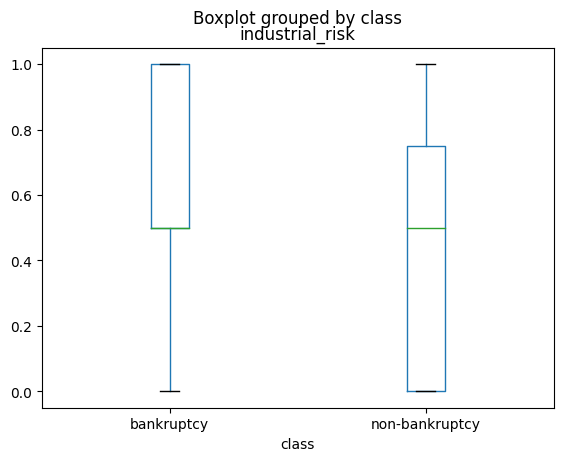

In [22]:
bplot = df.boxplot(by ='class', column =['industrial_risk'], grid = False)

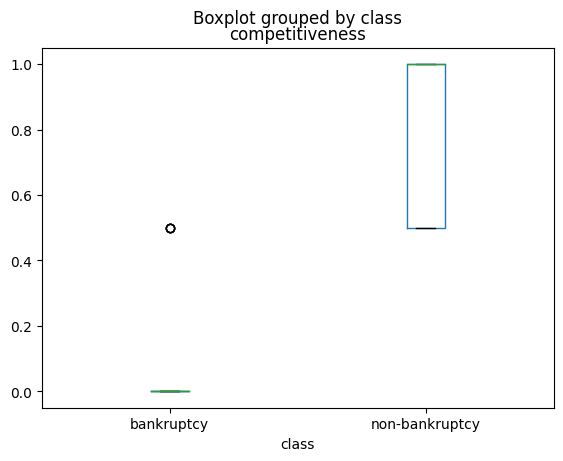

In [23]:
bplot = df.boxplot(by ='class', column =['competitiveness'], grid = False)

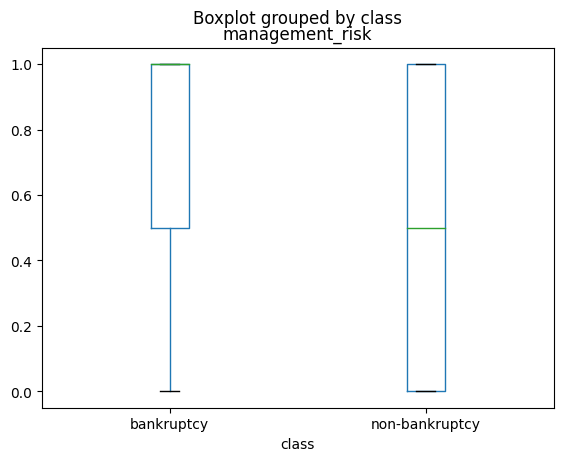

In [24]:
bplot = df.boxplot(by ='class', column =['management_risk'], grid = False)

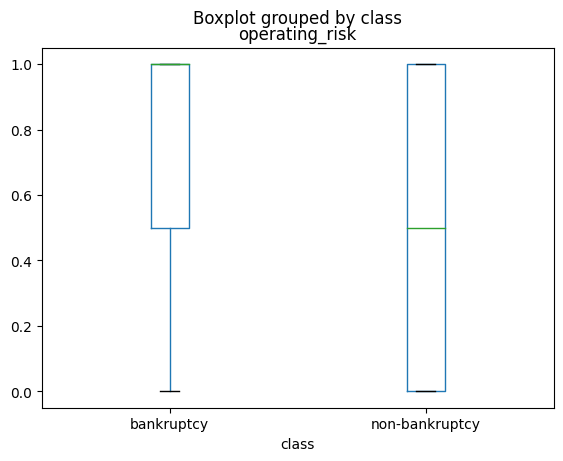

In [25]:
bplot = df.boxplot(by ='class', column =['operating_risk'], grid = False)

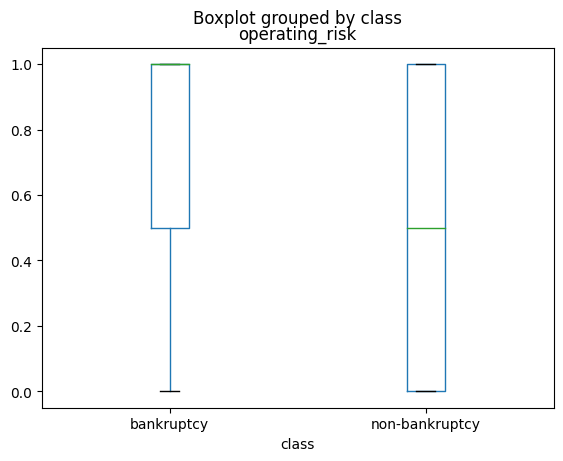

In [26]:
bplot = df.boxplot(by ='class', column =['operating_risk'], grid = False)

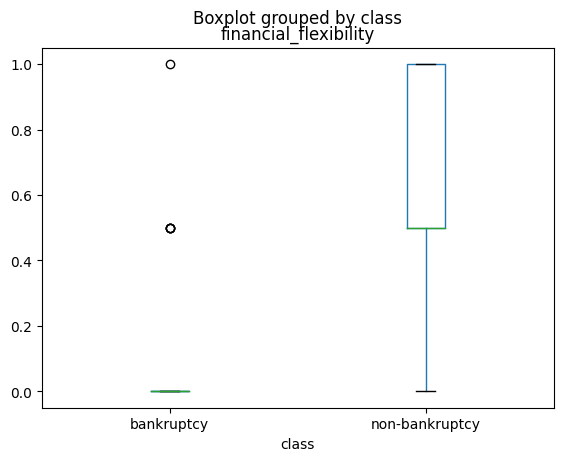

In [27]:
bplot = df.boxplot(by ='class', column =['financial_flexibility'], grid = False)

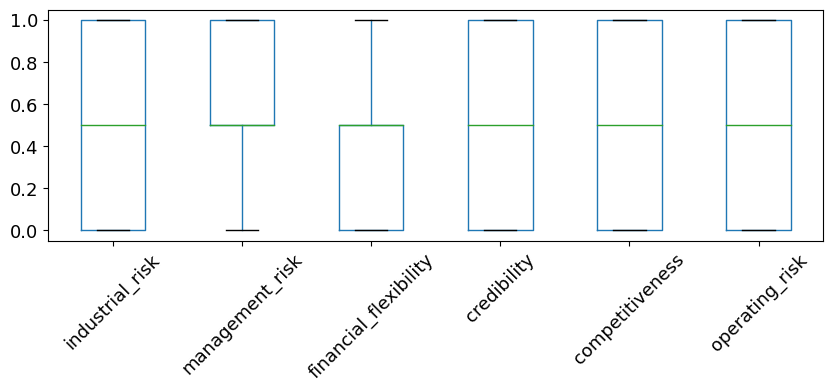

In [28]:
fig = plt.figure(figsize = (10, 3)) 
boxplot = df.boxplot(grid=False, rot=45, fontsize=13)  

### Explore relationships between features:

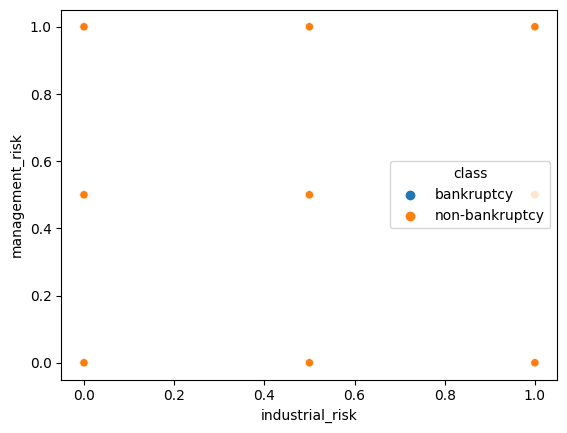

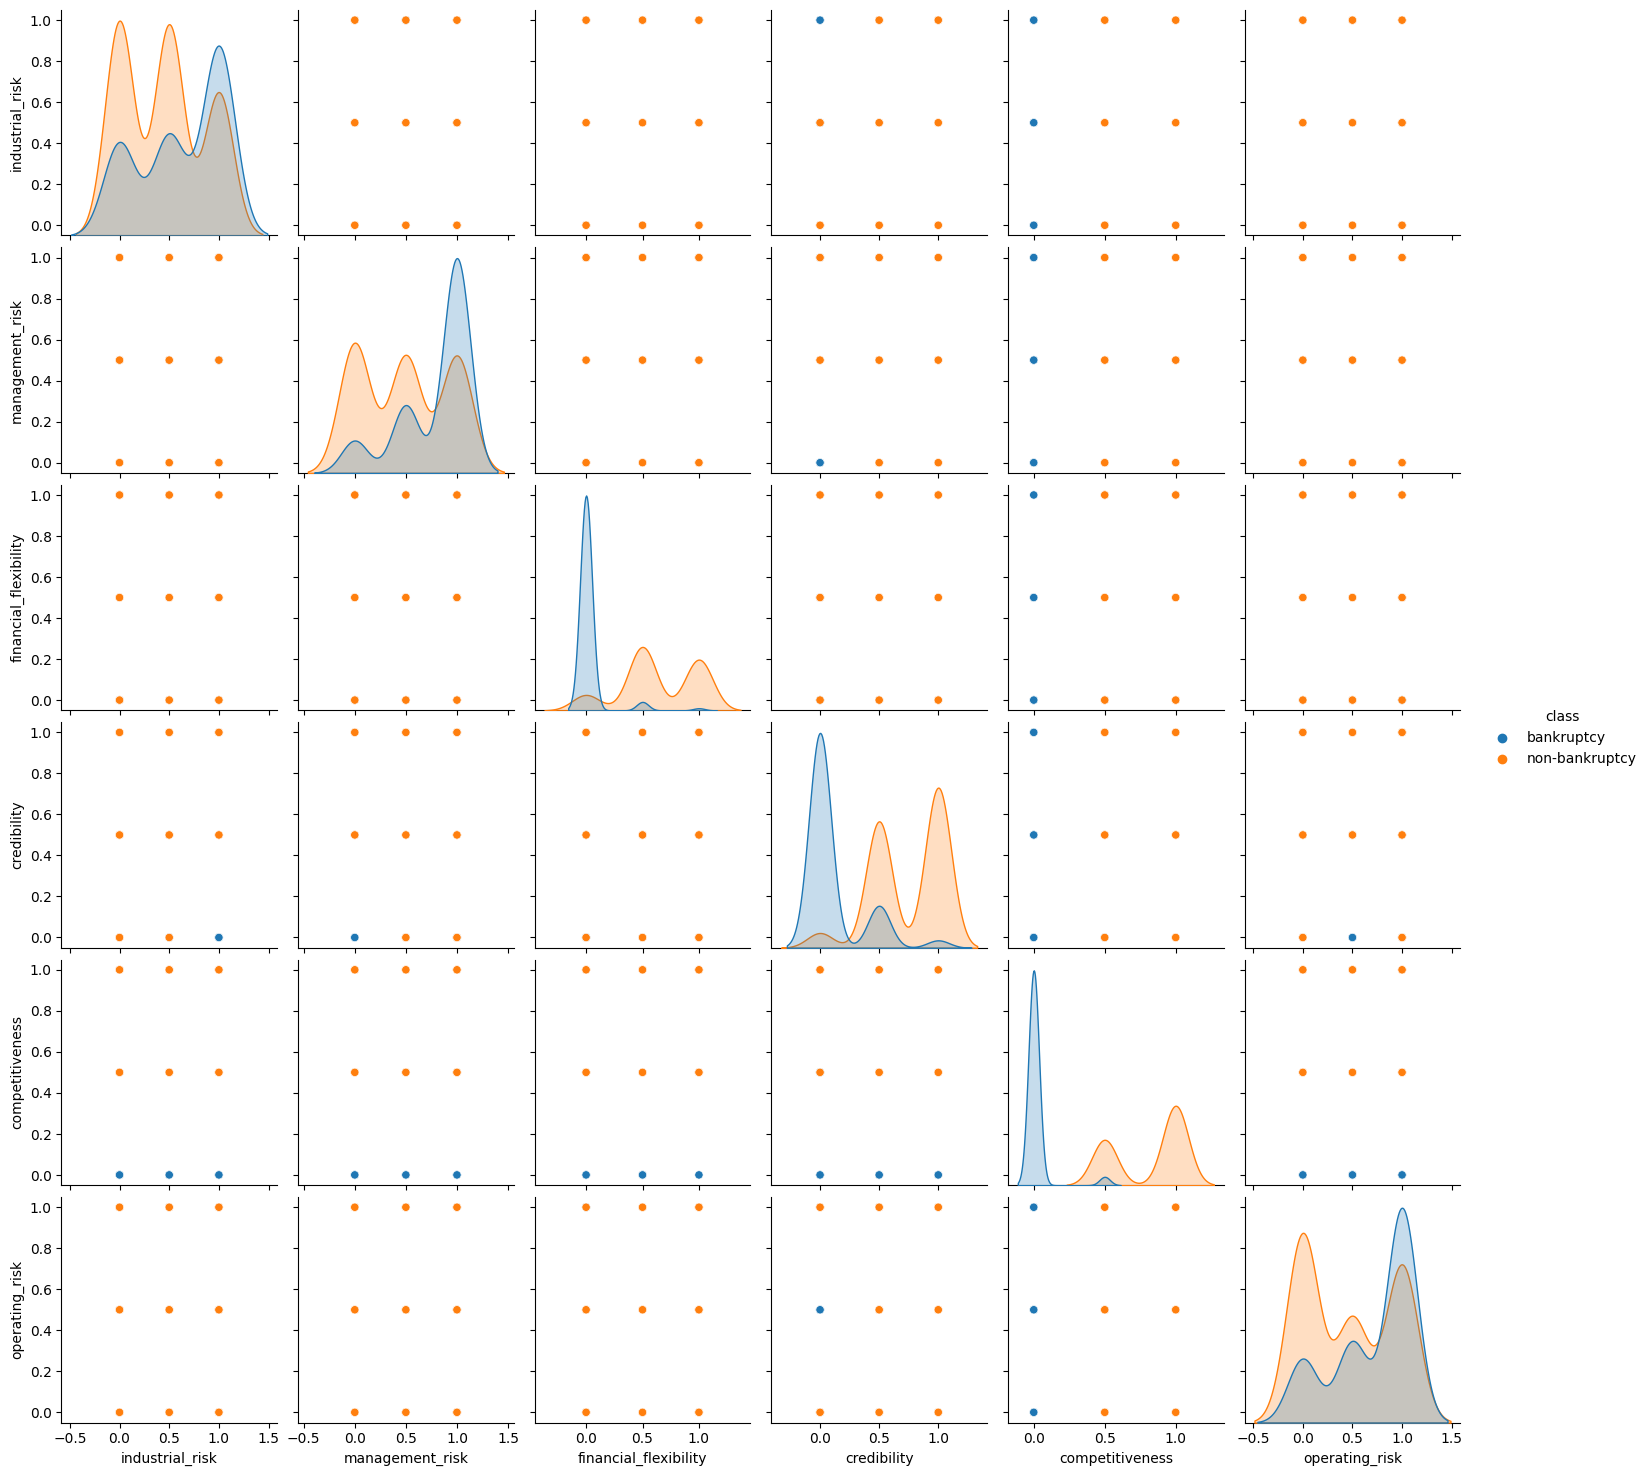

C:\Users\sachi\AppData\Local\Temp\ipykernel_8060\1924828381.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


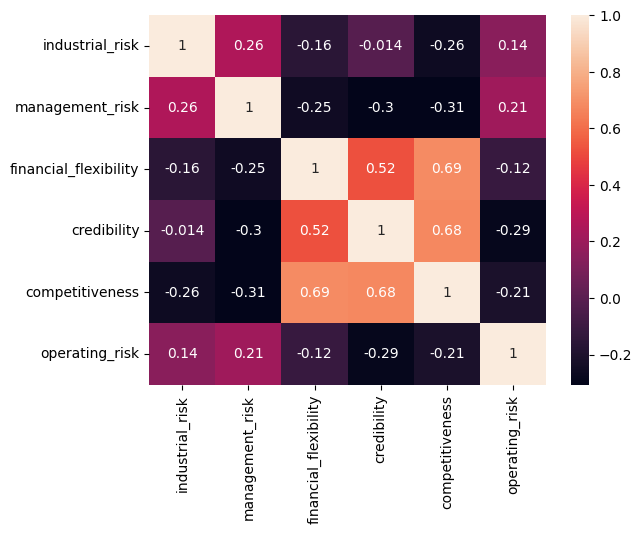

In [29]:
# Plot a scatterplot of two features
sns.scatterplot(data=df, x='industrial_risk', y='management_risk', hue='class')
plt.show()

# Plot a pair plot of multiple features
sns.pairplot(df, hue='class')
plt.show()

# Calculate the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Feature engineering:

In [19]:
feature_list= df.columns[0:-1]

In [20]:
feature_list

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

In [21]:
# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[feature_list]= scaler.fit_transform(df[feature_list])

### Data preprocessing:

In [37]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'class'.
df['class']= label_encoder.fit_transform(df['class'])
  
df['class'].unique()

# Handle missing values
df = df.fillna(df.mean())

target_variable = 'class'
# Split the dataset into features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]

In [34]:
from sklearn.feature_selection import chi2

In [35]:
# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))

In [38]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


### Chi-Square Test
Now that we have built the contingency table we can pass it to chi2_contingency function from the scipy package which returns the:

chi2: The test statistic

p: The p-value of the test

dof: Degrees of freedom

expected: The expected frequencies, based on the marginal sums of the table

The null hypothesis can be framed in the below manner: The grouping variables have no association or correlation amongst them.

The alternate Hypothesis goes as framed below: The variables are associated with each other and happen to have a correlation between the variables.

In [37]:
contigency= pd.crosstab(df['class'], df['management_risk'])
contigency
contigency_pct = pd.crosstab(df['class'], df['management_risk'], normalize='index')
contigency_pct
'''
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
'''

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 2.3366640799655196e-08
Reject NULL HYPOTHESIS


In [39]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [39]:
contigency= pd.crosstab(df['class'], df['industrial_risk'])
contigency
contigency_pct = pd.crosstab(df['class'], df['industrial_risk'], normalize='index')
contigency_pct
'''
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
'''
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 0.0003510555520073703
Reject NULL HYPOTHESIS


In [40]:
contigency= pd.crosstab(df['class'], df['financial_flexibility'])
contigency
contigency_pct = pd.crosstab(df['class'], df['financial_flexibility'], normalize='index')
contigency_pct

'''
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
'''

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 7.334022479874038e-38
Reject NULL HYPOTHESIS


In [41]:
contigency= pd.crosstab(df['class'], df['credibility'])
contigency
contigency_pct = pd.crosstab(df['class'], df['credibility'], normalize='index')
contigency_pct

'''
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
'''

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 5.877823993544079e-35
Reject NULL HYPOTHESIS


In [42]:
contigency= pd.crosstab(df['class'], df['competitiveness'])
contigency
contigency_pct = pd.crosstab(df['class'], df['competitiveness'], normalize='index')
contigency_pct

'''
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
'''

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 1.017869598909574e-51
Reject NULL HYPOTHESIS


In [43]:
contigency= pd.crosstab(df['class'], df['operating_risk'])
contigency
contigency_pct = pd.crosstab(df['class'], df['operating_risk'], normalize='index')
contigency_pct

'''
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
'''

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 5.429569801610119e-05
Reject NULL HYPOTHESIS


In [44]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

p value: 2.1012510084321545e-09
Reject NULL HYPOTHESIS


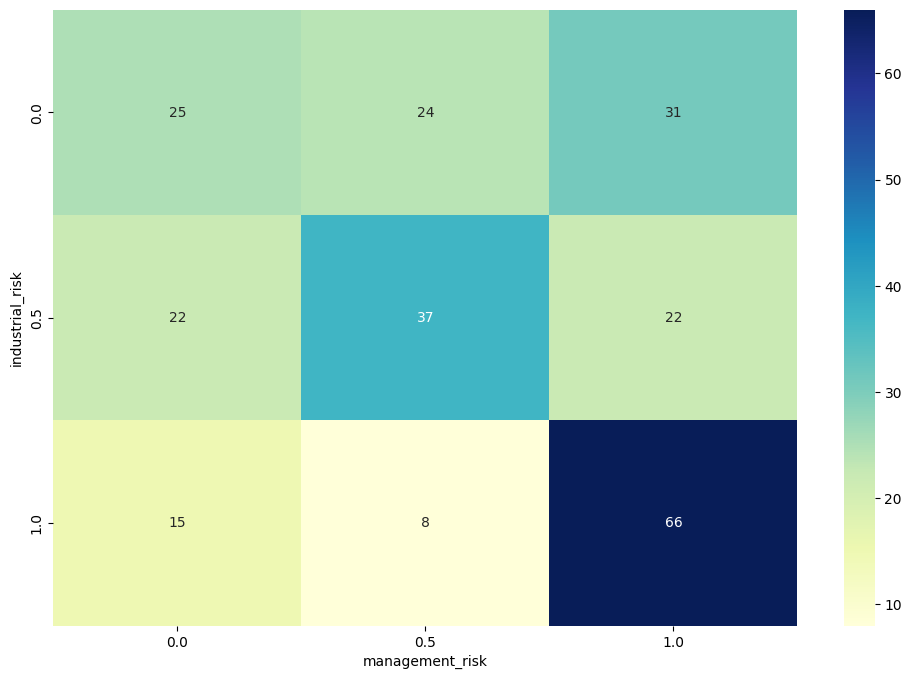

In [45]:
contigency= pd.crosstab(df['industrial_risk'], df['management_risk'])
contigency
contigency_pct = pd.crosstab(df['industrial_risk'], df['management_risk'], normalize='index')
contigency_pct

plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

In [40]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [42]:

# Load data
X =  df.drop(['class'], axis=1).values
y =  df['class'].values


In [53]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
clf = LogisticRegression()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

pd.crosstab(y_test,y_pred)

col_0,0,1
row_0,,
0,21,0
1,0,29


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

pd.crosstab(y_test,y_pred)

0.98


col_0,0,1
row_0,,
0,21,0
1,1,28


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
clf = RandomForestClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

pd.crosstab(y_test,y_pred)

1.0


col_0,0,1
row_0,,
0,21,0
1,0,29


In [47]:
import pickle

In [48]:
pickle.dump(clf, open('model_RandomForest.pkl', 'wb'))

In [49]:
pickled_model = pickle.load(open('model_RandomForest.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [77]:
from sklearn import svm

In [78]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Use the classifier to predict the labels of the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


pd.crosstab(y_test,y_pred)

Accuracy: 0.9733333333333334


col_0,0,1
row_0,,
0,37,2
1,0,36


In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Use the classifier to predict the labels of the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

pd.crosstab(y_test,y_pred)

Accuracy: 1.0


col_0,0,1
row_0,,
0,33,0
1,0,42


In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training set
gnb.fit(X_train, y_train)

# Use the classifier to predict the labels of the test set
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
pd.crosstab(y_test,y_pred)

Accuracy: 0.9866666666666667


col_0,0,1
row_0,,
0,31,1
1,0,43


In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier()

# Train the classifier on the training set
gbc.fit(X_train, y_train)

# Use the classifier to predict the labels of the test set
y_pred = gbc.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
pd.crosstab(y_test,y_pred)

Accuracy: 0.9866666666666667


col_0,0,1
row_0,,
0,33,0
1,1,41


In [87]:
from sklearn.naive_bayes import MultinomialNB

In [117]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier on the training set
mnb.fit(X_train, y_train)

# Use the classifier to predict the labels of the test set
y_pred = mnb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
pd.crosstab(y_test,y_pred)

Accuracy: 0.9866666666666667


col_0,0,1
row_0,,
0,33,1
1,0,41


In [124]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [127]:
# Define the neural network architecture
def create_model(units1=64, units2=32, dropout1=0.5, dropout2=0.5):
    model = Sequential()
    model.add(Dense(units1, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(dropout1))
    model.add(Dense(units2, activation='relu'))
    model.add(Dropout(dropout2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a Keras classifier with default parameters
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid to search over
param_grid = {'units1': [32, 64, 128], 'units2': [16, 32, 64], 'dropout1': [0.2, 0.5, 0.8], 'dropout2': [0.2, 0.5, 0.8]}

# Perform a grid search over the hyperparameter grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best parameters: ", grid_result.best_params_)
print("Best accuracy: ", grid_result.best_score_)

# Use the best model to predict the labels of the test set
y_pred = grid_result.predict(X_test)

# Evaluate the accuracy of the best model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\sachi\AppData\Local\Temp\ipykernel_8060\2779820077.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best parameters:  {'dropout1': 0.2, 'dropout2': 0.5, 'units1': 64, 'units2': 64}
Best accuracy:  0.8571011225382487
3/3 [==============================] - 0s 5ms/step
Accuracy: 0.56


In [128]:
pd.crosstab(y_test,y_pred.flatten())

col_0,0,1
row_0,,
0,14,20
1,13,28
